# 3장 머신러닝의 기초 - 
### 03-1 수치 예측 (회귀)

In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes() # sklearn 에서 제공하는 Bunch 클래스

In [6]:
print(diabetes.data.shape, diabetes.target.shape) # (입력, 타겟)
# 튜플 구조라서 (442,) 처럼 출력됨.

(442, 10) (442,)


In [7]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [15]:
diabetes.data[:10,3]

array([ 0.02187235, -0.02632783, -0.00567061, -0.03665645,  0.02187235,
       -0.01944209, -0.01599922,  0.06662967, -0.04009932, -0.03321358])

In [8]:
diabetes.target[:3]

array([151.,  75., 141.])

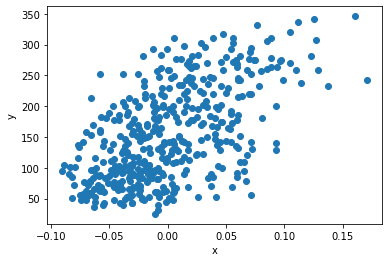

In [9]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:,2], diabetes.target) # 모든 행의 세번째 특성만!
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
x, y = diabetes.data[:,2], diabetes.target

----

### 03-2 경사하강법

In [17]:
w , b = 1. , 1.


In [22]:
print(x[0])

0.0616962065186885


In [18]:
y_hat = x[0] * w + b
print(y_hat) # 첫번째 샘플에 대한 예측값 만들기

1.0616962065186886


In [19]:
print(y[0])

151.0


In [20]:
# w를 0.1만큼 증가시켜 보기
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705574


In [21]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)  # 변화율

0.061696206518688734


In [24]:
w_new = w + w_rate
print( w_new) # 변화율을 더하면 예측값이 증가!

1.0616962065186888


In [25]:
b_inc = b+ 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

1.1616962065186887


In [26]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)

In [27]:
print(b_rate)

1.0


In [28]:
b_new = b+1
print(b_new)

2.0


In [30]:
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b+ 1 *err
print(w_new, b_new) # 이전에 비해 가중치와 절편이 큰 폭으로 바뀜.

10.250624555904514 150.9383037934813


In [41]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

[14.05126318 14.06162841 14.05262703 14.04376203 14.05344533 14.05862795
 14.05303618 14.06326502 14.05685495 14.02957803 14.05808241 14.06244672
 14.04744441 14.0466261  14.05576387 14.04853549 14.04921741 14.05221787
 14.05862795 14.04894464 14.0625831  14.06517441 14.0625831  14.03844303
 14.04676249 14.04430757 14.05317256 14.06026456 14.05399087 14.03326041
 14.05426364 14.06381056 14.02535011 14.05999179 14.06299225 14.05794602
 14.03571534 14.03421511 14.03748834 14.05958264 14.05821879 14.0643561
 14.06353779 14.05930987 14.03653364 14.06462887 14.04594418 14.05249064
 14.06162841 14.05249064 14.05071764 14.04117072 14.06381056 14.05767326
 14.04703526 14.05440003 14.06476525 14.06681102 14.04867187 14.04867187
 14.06353779 14.05221787 14.06476525 14.05440003 14.06217395 14.04962656
 14.05139956 14.05862795 14.05003572 14.0475808  14.06531079 14.03503341
 14.04430757 14.05671856 14.06026456 14.0661291  14.04867187 14.04458034
 14.03748834 14.05644579 14.05235426 14.06490164 14.

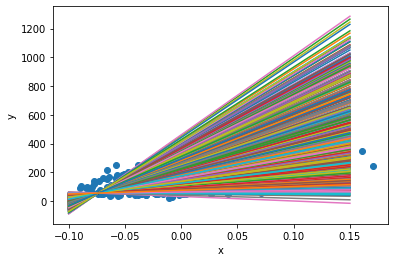

In [37]:
plt.scatter(x,y)
pt1= (-0.1,-0.1*w+b)
pt2 = (0.15, 0.15*w+b)
plt.plot([pt1[0],pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [40]:
y = 913.6* x + 123.4
x_new =0.18
y_pred = x_new * w + b
print(y_pred)

[ 554.39500894  205.22513737  508.45160478  807.08373178  480.88556229
  306.3006265   494.66858354  150.09305238  366.0270519  1284.89513498
  324.67798817  177.65909487  683.03654057  710.60258306  402.78177523
  646.28181724  623.31011517  522.23462603  306.3006265   632.498796
  173.06475446   85.77228656  173.06475446  986.26300798  706.00824264
  788.70637012  490.07424312  251.16854152  462.50820063 1160.84794377
  453.3195198   131.71569072 1427.31968786  260.35722235  159.28173321
  329.27232858 1078.14981629 1128.68756086 1018.42339089  274.1402436
  320.08364775  113.33832906  140.90437155  283.32892443 1050.5837738
  104.14964823  733.57428514  513.0459452   205.22513737  513.0459452
  572.7723706   894.37619968  131.71569072  338.46100941  696.81956181
  448.72517938   99.55530781   30.64020158  641.68747683  641.68747683
  140.90437155  522.23462603   99.55530781  448.72517938  186.8477757
  609.52709392  549.80066852  306.3006265   595.74407267  678.44220015
   81.177946

--------

### 03-3 손실함수와 경사하강법

회귀의 손실 함수 ; 제곱 오차 (squared error)

In [43]:
y_hat = x_i * w + b
err = y_i - y_hat
w_rate = x_i
w = w + w_rate * err
# 미분 결과를 가중치에서 빼면 손실함수의 낮은 쪽으로 이동

In [44]:
err = y_i - y_hat
b = b+ 1*err

---------

### 03-4 선형회귀 뉴런 만들기

In [46]:
class Neuron:
    
    def __init__(self):
        self.w = 1.0     # 가중치를 초기화합니다
        self.b = 1.0     # 절편을 초기화합니다
    
    def forpass(self, x):
        y_hat = x * self.w + self.b       # 직선 방정식을 계산합니다
        return y_hat
    
    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def fit(self, x, y, epochs=100):
        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                y_hat = self.forpass(x_i) # 정방향 계산
                err = -(y_i - y_hat)      # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= w_grad          # 가중치 업데이트
                self.b -= b_grad          # 절편 업데이트

In [47]:
neuron = Neuron()
neuron.fit(x, y)

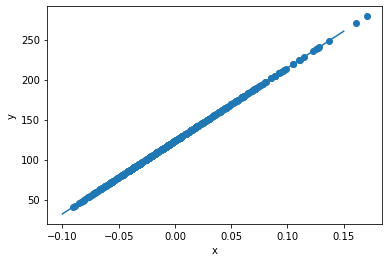

In [48]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()